<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/ByteNav/feature_eng_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Automated Feature Engineering Tools
## Group: Byte Navigators (ByteNav)

## Group Member:
<table>
  <tr>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <th>SOO WAN YING</th>
    <th>A21EC0227</th>
  </tr>
  <tr>
    <th>YEW RUI XIANG</th>
    <th>A21EC0149</th>
  </tr>
  <tr>
    <th>LAU YEE CHI</th>
    <th>A21EC0042</th>
  </tr>
  <tr>
    <th>LOO ZHI YUAN</th>
    <th>A21EC0197</th>
  </tr>
</table>


## 1. Dataset Selection
We have choose a large dataset which contains 5.7 million new and used vehicle listings (~2M unique vins) from aprox 1.2k dealers in Illinois from June 2018 to June 2020 with a daily resolution. The data is provided as a sample from [AutoDealerData.com](https://autodealerdata.com/?ref=kaggle).

The title of the dataset is "*Large Car Dataset" and the dataset used is from **CIS_Automotive_Kaggle_Sample.csv. The dataset consist of 5.7M rows and 156 columns. Our main purpose working on this dataset is preparing it through a series of data cleaning and feature engineering technique to construct a model for predicting the *"askPrice"** which are last ask price before the vehicle was sold. For seeking more details of each attributes, go ahead the below source link.

Source of dataset:
https://www.kaggle.com/datasets/cisautomotiveapi/large-car-dataset

## 2. Loading the Dataset

### 2.1 Install required packages

In [1]:
# install opendatasets for reading the dataset from kaggle
!pip install opendatasets

In [2]:
# install scikit-learn packages
!pip install -U scikit-learn

In [3]:
# install featuretools packages
!pip install -U featuretools

### 2.2 Import required libraries

In [4]:
# import required datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od

### 2.3 Import Dataset

In [5]:
# download and assign the csv file into variable named file
od.download(
    "https://www.kaggle.com/datasets/cisautomotiveapi/large-car-dataset")

file = ('large-car-dataset/CIS_Automotive_Kaggle_Sample.csv')

Skipping, found downloaded files in "./large-car-dataset" (use force=True to force download)


The dimensionality of this dataset is too large and unable to support by the RAM of the Google Colad. Therefore, we first loop through chunk of the dataset to get the number of missing values in each columns before dropping the columns with the null values greater 40% out of the size of the dataset.

In [6]:
# Chunk the datasets into 1000000 chunk size each
chunksize = 1000000
null_values_columns = [0] * 156
total_rows = 0

# Specific the datatypes of certain columns
dtypes={"interiorColor":object, "vf_AxleConfiguration":object, "vf_BatteryInfo":object, "vf_BatteryType":object,
        "vf_BrakeSystemDesc":object, "vf_MakeID":np.float64, "vf_ManufacturerId":np.float64, "vf_ModelID":np.float64,
        "vf_ModelYear":np.float64, "vf_NCSANote":object, "vf_OtherMotorcycleInfo":object, "vf_PossibleValues":object,
        "vf_Trim2":object,}

for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
  # read null value in each columns
  null_values_columns += chunk.isnull().sum()
  total_rows += chunk.shape[0]

# Examine the columns which have the null values less than 40% out of the total size
columns_need = (null_values_columns/total_rows) < 0.4

<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,22,25,53,65,67,69,70,91,122) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,18,53,65,67,69,79,91,122,133) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,18,25,53,65,67,69,91,122,133) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,18,25,53,65,67,69,91,113,122,133) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarni

In [7]:
# Identify the columns to retain for use
columns_need_index = columns_need[columns_need == True].index
print("Number of columns remain for used: " + str(len(columns_need_index)))
print("Columns remain for used: " + str(columns_need_index))

Number of columns remain for used: 47
Columns remain for used: Index(['vin', 'stockNum', 'firstSeen', 'lastSeen', 'msrp', 'askPrice',
       'mileage', 'isNew', 'color', 'brandName', 'modelName', 'dealerID',
       'vf_AirBagLocFront', 'vf_AirBagLocSide', 'vf_BodyClass',
       'vf_BusFloorConfigType', 'vf_BusType', 'vf_CustomMotorcycleType',
       'vf_DisplacementCC', 'vf_DisplacementCI', 'vf_DisplacementL',
       'vf_Doors', 'vf_DriveType', 'vf_EngineConfiguration',
       'vf_EngineCylinders', 'vf_FuelTypePrimary', 'vf_GVWR', 'vf_Make',
       'vf_MakeID', 'vf_Manufacturer', 'vf_ManufacturerId', 'vf_Model',
       'vf_ModelID', 'vf_ModelYear', 'vf_MotorcycleChassisType',
       'vf_MotorcycleSuspensionType', 'vf_PlantCity', 'vf_PlantCompanyName',
       'vf_PlantCountry', 'vf_PlantState', 'vf_SeatBeltsAll', 'vf_Series',
       'vf_TPMS', 'vf_TrailerBodyType', 'vf_TrailerType', 'vf_VIN',
       'vf_VehicleType'],
      dtype='object')


Sampling method is carried out to retrieve the random sample from the dataset. The similar is that we used chunk of the dataset by filtering out the rows with null values and select a random set of rows/data from the chunk. The random sample is then stored in a dataframe(df).

In [8]:
# Use sampling method to read the dataset for furture processing
chunksize = 1000000
df = pd.DataFrame()
dtypes={"interiorColor":object, "vf_AxleConfiguration":object, "vf_BatteryInfo":object, "vf_BatteryType":object,
        "vf_BrakeSystemDesc":object, "vf_MakeID":np.float64, "vf_ManufacturerId":np.float64, "vf_ModelID":np.float64,
        "vf_ModelYear":np.float64, "vf_NCSANote":object, "vf_OtherMotorcycleInfo":object, "vf_PossibleValues":object,
        "vf_Trim2":object,}

for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
  # Drop the row consisting null value to make sure no null value in any columns in our sample data for ease of data processing
  chunk = chunk.dropna()
  # Select random set of data from the chunk with specified fraction which is 0.25
  chunk = chunk.sample(frac=0.25, random_state=99)
  # Concatenate the dataframe from each chunk
  df = pd.concat([df, chunk], ignore_index=True)

df.shape

<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have m

(116349, 47)

In [9]:
df

,vin,stockNum,firstSeen,lastSeen,msrp,askPrice,mileage,isNew,color,brandName,...,vf_PlantCompanyName,vf_PlantCountry,vf_PlantState,vf_SeatBeltsAll,vf_Series,vf_TPMS,vf_TrailerBodyType,vf_TrailerType,vf_VIN,vf_VehicleType
0,a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4c...,J79183-1,2019-12-05,2020-05-06,36465,28689,7736,False,Billet Silver Metallic Clearcoat,JEEP,...,BELVIDERE ASSEMBLY,UNITED STATES (USA),ILLINOIS,Manual,Trailhawk,Direct,Not Applicable,Not Applicable,a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4c...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
1,8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0...,12649F,2020-05-03,2020-05-21,14887,14505,0,False,Billet Clearcoat,DODGE,...,Toluca Assembly,MEXICO,STATE OF MEXICO,Manual,SXT,Direct,Not Applicable,Not Applicable,8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
2,4bb08e5895ac1e226fc35d37e913eb071cea8ce789cc24...,Touring L Plus,2018-08-13,2018-10-16,0,0,0,True,Brilliant Black Crystal Pearl-Coat Exterior Paint,CHRYSLER,...,Windsor Assembly,CANADA,ONTARIO,Manual,Touring L Plus,Direct,Not Applicable,Not Applicable,4bb08e5895ac1e226fc35d37e913eb071cea8ce789cc24...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
3,f9225fe0632a6b379ff2e6b719f247d842fe3d850c70c8...,R/T,2018-12-14,2019-01-12,0,0,0,True,DB Black Exterior Paint,DODGE,...,JEFFERSON NORTH ASSEMBLY,UNITED STATES (USA),MICHIGAN,Manual,R/T,Direct,Not Applicable,Not Applicable,f9225fe0632a6b379ff2e6b719f247d842fe3d850c70c8...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
4,c909e6c0ff580f7eb53ac519faaef9e5e2de4fcc79ea2f...,38057,2018-08-05,2018-10-10,29895,28895,12528,False,Sandy Ridge,CHEVROLET,...,CAMI,CANADA,ONTARIO,Manual,Premier (1LZ),Direct,Not Applicable,Not Applicable,c909e6c0ff580f7eb53ac519faaef9e5e2de4fcc79ea2f...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116344,143161f59a0a4551989610615430af855e9637706e8a34...,181459,2018-09-11,2018-09-13,83695,83695,0,True,Mocha,LINCOLN,...,Kentucky Truck,UNITED STATES (USA),KENTUCKY,Manual,Reserve,Direct,Not Applicable,Not Applicable,143161f59a0a4551989610615430af855e9637706e8a34...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
116345,6485bbd0739fc161914c7cbbde019e370a14a0fb1b17b7...,27527A,2018-11-16,2018-12-29,25500,25500,0,False,Siren Red Tintcoat,CHEVROLET,...,GMNA,UNITED STATES (USA),MICHIGAN,Manual,1LT,Direct,Not Applicable,Not Applicable,6485bbd0739fc161914c7cbbde019e370a14a0fb1b17b7...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
116346,a2f4a91d3441f1f8e90a3fd6164b4bdcaea9e4a4806119...,N190484,2018-11-02,2018-11-02,40950,40950,0,True,Billet Silver Metallic Clearcoat,JEEP,...,BELVIDERE ASSEMBLY,UNITED STATES (USA),ILLINOIS,Manual,Limited,Direct,Not Applicable,Not Applicable,a2f4a91d3441f1f8e90a3fd6164b4bdcaea9e4a4806119...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
116347,abe751eccaec60d0e1e9b7b3faca2261e8734459bc65af...,GUC67244,2019-02-27,2019-07-08,19990,19200,39670,False,Oxford White,FORD,...,Louisville Assembly,UNITED STATES (USA),KENTUCKY,Manual,SE,Direct,Not Applicable,Not Applicable,abe751eccaec60d0e1e9b7b3faca2261e8734459bc65af...,MULTIPURPOSE PASSENGER VEHICLE (MPV)


## 3. Data Preprocessing & Exploratory Data Analysis (EDA)

In [10]:
df.shape

(116349, 47)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116349 entries, 0 to 116348
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   vin                          116349 non-null  object 
 1   stockNum                     116349 non-null  object 
 2   firstSeen                    116349 non-null  object 
 3   lastSeen                     116349 non-null  object 
 4   msrp                         116349 non-null  int64  
 5   askPrice                     116349 non-null  int64  
 6   mileage                      116349 non-null  int64  
 7   isNew                        116349 non-null  bool   
 8   color                        116349 non-null  object 
 9   brandName                    116349 non-null  object 
 10  modelName                    116349 non-null  object 
 11  dealerID                     116349 non-null  int64  
 12  vf_AirBagLocFront            116349 non-null  object 
 13 

There might be no null values for each columns since we are filtering the null row of data during extracting the sample of dataset.

In [12]:
# sum of null values in each columns
df.isnull().sum()

vin                            0
stockNum                       0
firstSeen                      0
lastSeen                       0
msrp                           0
askPrice                       0
mileage                        0
isNew                          0
color                          0
brandName                      0
modelName                      0
dealerID                       0
vf_AirBagLocFront              0
vf_AirBagLocSide               0
vf_BodyClass                   0
vf_BusFloorConfigType          0
vf_BusType                     0
vf_CustomMotorcycleType        0
vf_DisplacementCC              0
vf_DisplacementCI              0
vf_DisplacementL               0
vf_Doors                       0
vf_DriveType                   0
vf_EngineConfiguration         0
vf_EngineCylinders             0
vf_FuelTypePrimary             0
vf_GVWR                        0
vf_Make                        0
vf_MakeID                      0
vf_Manufacturer                0
vf_Manufac

In [13]:
df.describe()

,msrp,askPrice,mileage,dealerID,vf_DisplacementCC,vf_DisplacementCI,vf_DisplacementL,vf_Doors,vf_EngineCylinders,vf_MakeID,vf_ManufacturerId,vf_ModelID,vf_ModelYear
count,1.163490e+05,1.163490e+05,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000
mean,5.641291e+05,1.182654e+05,17783.287695,19391.166155,3003.576997,183.319327,3.004319,4.097998,5.243423,469.121720,1013.036794,3287.714179,2017.308709
std,3.389935e+07,1.407736e+07,30864.313163,10644.093253,928.069208,56.641326,0.928046,0.359426,1.121652,15.263991,503.324161,4281.946255,2.232024
min,0.000000e+00,0.000000e+00,0.000000,190.000000,1300.000000,79.330867,1.300000,2.000000,3.000000,448.000000,962.000000,1797.000000,2008.000000
25%,1.914400e+04,1.790000e+04,0.000000,10556.000000,2400.000000,146.456986,2.400000,4.000000,4.000000,460.000000,976.000000,1800.000000,2017.000000
50%,2.799900e+04,2.557700e+04,0.000000,21197.000000,3500.000000,213.583104,3.500000,4.000000,6.000000,467.000000,984.000000,1939.000000,2018.000000
75%,3.699800e+04,3.411600e+04,26874.000000,27980.000000,3600.000000,219.685479,3.600000,4.000000,6.000000,478.000000,994.000000,2217.000000,2019.000000
max,2.147484e+09,2.147484e+09,377868.000000,39979.000000,6600.000000,402.756711,6.600000,5.000000,8.000000,1056.000000,16405.000000,25919.000000,2020.000000


The unique values in each columns is examined to make decisions on the needs to drop the no variability columns and changing to the suitable datatypes.

In [14]:
No_variability_column = []
for column in df.columns:
  # Drop columns which does not have variability (no variability column contribute nothing for analysis)
  if len(df[column].unique()) == 1:
    df.drop(columns=column, inplace=True)
    No_variability_column.append(column)
    continue

  # Change the datatype of the column with less unique value to categorical type
  if len(df[column].unique()) < 2000 and column != 'isNew':
    if column == 'vf_DisplacementCC' or column == 'vf_DisplacementCI' or column == 'vf_DisplacementL':
      df[column] = df[column].astype('float64')
    else:
      if column in ['vf_Doors', 'vf_EngineCylinders', 'vf_MakeID', 'vf_ManufacturerId', 'vf_ModelID', 'vf_ModelYear']:
        df[column] = df[column].astype('int64')
      df[column] = df[column].astype('category')

  print("Unique values in {}: {}".format(column, len(df[column].unique())))

print("Columns which does not have variability and dropped: {}".format(No_variability_column))

Unique values in vin: 83750
Unique values in stockNum: 76968
Unique values in firstSeen: 1275
Unique values in lastSeen: 731
Unique values in msrp: 20090
Unique values in askPrice: 27380
Unique values in mileage: 27786
Unique values in isNew: 2
Unique values in color: 1966
Unique values in brandName: 20
Unique values in modelName: 63
Unique values in dealerID: 1120
Unique values in vf_AirBagLocSide: 4
Unique values in vf_BodyClass: 8
Unique values in vf_DisplacementCC: 33
Unique values in vf_DisplacementCI: 33
Unique values in vf_DisplacementL: 30
Unique values in vf_Doors: 3
Unique values in vf_DriveType: 6
Unique values in vf_EngineConfiguration: 2
Unique values in vf_EngineCylinders: 5
Unique values in vf_FuelTypePrimary: 4
Unique values in vf_GVWR: 8
Unique values in vf_Make: 20
Unique values in vf_MakeID: 20
Unique values in vf_Manufacturer: 16
Unique values in vf_ManufacturerId: 16
Unique values in vf_Model: 63
Unique values in vf_ModelID: 63
Unique values in vf_ModelYear: 13
Uni

Examined the unique values in each columns.

In [15]:
i = 0
for column in df.columns:
  print(str(i) + ": Columns " + column)
  print(df[column].unique())
  print()
  i += 1

0: Columns vin
['a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4cf14025218a8a14756c'
 '8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0143f69e05664467ff9'
 '4bb08e5895ac1e226fc35d37e913eb071cea8ce789cc241863633abbb0b03051' ...
 '143161f59a0a4551989610615430af855e9637706e8a34dbcd21a7423890c42f'
 '6485bbd0739fc161914c7cbbde019e370a14a0fb1b17b7825c24d3fa4d8fcaae'
 'a2f4a91d3441f1f8e90a3fd6164b4bdcaea9e4a4806119a62064314997946129']

1: Columns stockNum
['J79183-1' '12649F' 'Touring L Plus' ... 'J21003' '181459' '27527A']

2: Columns firstSeen
['2019-12-05', '2020-05-03', '2018-08-13', '2018-12-14', '2018-08-05', ..., '2017-02-26', '2017-11-13', '2017-06-26', '2017-05-14', '2017-04-02']
Length: 1275
Categories (1275, object): ['2016-05-17', '2016-05-30', '2016-06-19', '2016-06-29', ..., '2020-05-29',
                            '2020-05-30', '2020-05-31', '2021-03-04']

3: Columns lastSeen
['2020-05-06', '2020-05-21', '2018-10-16', '2019-01-12', '2018-10-10', ..., '2020-03-30', '2020-01-19', '2

In [16]:
df.dtypes

vin                         object
stockNum                    object
firstSeen                 category
lastSeen                  category
msrp                         int64
askPrice                     int64
mileage                      int64
isNew                         bool
color                     category
brandName                 category
modelName                 category
dealerID                  category
vf_AirBagLocSide          category
vf_BodyClass              category
vf_DisplacementCC          float64
vf_DisplacementCI          float64
vf_DisplacementL           float64
vf_Doors                  category
vf_DriveType              category
vf_EngineConfiguration    category
vf_EngineCylinders        category
vf_FuelTypePrimary        category
vf_GVWR                   category
vf_Make                   category
vf_MakeID                 category
vf_Manufacturer           category
vf_ManufacturerId         category
vf_Model                  category
vf_ModelID          

In [17]:
# Convert some columns to datetime
df['firstSeen'] = pd.to_datetime(df['firstSeen'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [18]:
# Convert some columns to float64
df['askPrice'] = df['askPrice'].astype('float64')
df['msrp'] = df['msrp'].astype('float64')

Examined the duplicated rows and columns of the sample dataset. Drop if exists.

In [19]:
# Examined the duplicated rows
df.duplicated().sum()

0

In [20]:
# Examined the duplicated rows
df.T.duplicated().sum()

3

In [21]:
# Identified duplicated columns
dulplicated_columns = df.T.duplicated().index[df.T.duplicated()]
dulplicated_columns

Index(['vf_Make', 'vf_Model', 'vf_VIN'], dtype='object')

In [22]:
# Drop duplicated columns
df.drop(dulplicated_columns, axis='columns', inplace=True)

The dataset have primary key of vehicle identification number(vin) which cannot contain duplicate values. Drop if exists.

In [23]:
df = df.drop_duplicates(subset='vin', keep='first')

Examined the columns **askPrice** and **msrp** to remove the data with less than of equal to 0 value.

In [24]:
((df['askPrice'] <= 0) | (df['msrp'] <= 0))

0         False
1         False
2          True
3          True
4         False
          ...  
116342    False
116343    False
116344    False
116345    False
116346    False
Length: 83750, dtype: bool

In [25]:
df_copy = df.copy(deep=True)

In [26]:
# Drop the target value columns with 0 values askPrice
df = df[~((df['askPrice'] == 0) & (df['msrp'] == 0))]
df.head()

,vin,stockNum,firstSeen,lastSeen,msrp,askPrice,mileage,isNew,color,brandName,...,vf_ManufacturerId,vf_ModelID,vf_ModelYear,vf_PlantCity,vf_PlantCompanyName,vf_PlantCountry,vf_PlantState,vf_Series,vf_TPMS,vf_VehicleType
0,a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4c...,J79183-1,2019-12-05,2020-05-06,36465.0,28689.0,7736,False,Billet Silver Metallic Clearcoat,JEEP,...,994,1945,2019,BELVIDERE,BELVIDERE ASSEMBLY,UNITED STATES (USA),ILLINOIS,Trailhawk,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
1,8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0...,12649F,2020-05-03,2020-05-21,14887.0,14505.0,0,False,Billet Clearcoat,DODGE,...,1002,1939,2018,TOLUCA,Toluca Assembly,MEXICO,STATE OF MEXICO,SXT,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
4,c909e6c0ff580f7eb53ac519faaef9e5e2de4fcc79ea2f...,38057,2018-08-05,2018-10-10,29895.0,28895.0,12528,False,Sandy Ridge,CHEVROLET,...,984,1847,2018,INGERSOLL,CAMI,CANADA,ONTARIO,Premier (1LZ),Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
5,d8cf4360d8fca51da6130376c7fee2427aecb7f5e2a762...,HW577421,2019-03-09,2019-03-13,19399.0,19399.0,57478,False,Black,TOYOTA,...,1085,2217,2017,WOODSTOCK,Toyota Motor Manufacturing Canada Inc.,CANADA,ONTARIO,ASA44L/ASA42L/AVA44L,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
6,12868f78b705eec3608cee144e8560cfb4884146f9ac0d...,J6454,2019-01-10,2019-04-03,42200.0,36113.0,0,True,Ocean Blue Metallic,JEEP,...,994,1943,2019,TOLEDO,TOLEDO NORTH ASSEMBLY,UNITED STATES (USA),OHIO,Unlimited Sport,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)


## 4. Feature Engineering with Automated Tools

### 4.1 Feature Engineering with FeatureTools

In [27]:
#import required libraries
import featuretools as ft
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Convert 'isNew' column to int
df['isNew'] = df['isNew'].astype(int)

# Create an EntitySet
es = ft.EntitySet(id='cars')

Creates a DataFrame named 'Vin' with unique VINs extracted from the 'vin' column.


In [29]:
Vin = pd.DataFrame(df.vin.unique(), columns = ["Vin"])

Removes duplicate rows in the original DataFrame based on the 'vin' column, keeping only the first occurrence, and add the main entity ('main') to the EntitySet, specifying that it is indexed by the 'Vin' DataFrame.

In [30]:
# Drop duplicates in 'vin' column
df = df.drop_duplicates(subset='vin', keep='first')
df_copy = df.drop('askPrice' ,axis=1)

# Add the main entity
es = es.add_dataframe(dataframe_name='main',
                             dataframe=df_copy,
                             index='Vin')

Adds another entity ('Vin') to the EntitySet, representing the unique VINs.

In [31]:
es = es.add_dataframe(dataframe_name = "Vin",
                          dataframe = Vin)

Establishes a relationship between the 'Vin' entity and the 'main' entity, linking them using the 'vin' column.

In [32]:
es.add_relationship("Vin", "Vin", "main", "vin")

Entityset: cars
  DataFrames:
    main [Rows: 74462, Columns: 35]
    Vin [Rows: 74462, Columns: 1]
  Relationships:
    main.vin -> Vin.Vin

Uses Featuretools' DFS function to generate new features based on aggregations and transformations specified by the provided parameters.


In [33]:
features, feature_names = ft.dfs(entityset=es, target_dataframe_name='main', agg_primitives=['mean', 'sum', 'mode', 'max', 'count'],
                                 trans_primitives=['month', 'year'],  max_depth = 2)

Outputs the first few rows of the generated features and displays their column names.

In [34]:
features.head()

,firstSeen,lastSeen,msrp,mileage,isNew,color,brandName,modelName,dealerID,vf_AirBagLocSide,...,Vin.MODE(main.vf_PlantState),Vin.MODE(main.vf_Series),Vin.MODE(main.vf_TPMS),Vin.MODE(main.vf_VehicleType),Vin.SUM(main.isNew),Vin.SUM(main.mileage),Vin.SUM(main.msrp),Vin.SUM(main.vf_DisplacementCC),Vin.SUM(main.vf_DisplacementCI),Vin.SUM(main.vf_DisplacementL)
Vin,,,,,,,,,,,,,,,,,,,,,
0,2019-12-05,2020-05-06,36465.0,7736,0,Billet Silver Metallic Clearcoat,JEEP,Cherokee,22294,All Rows,...,ILLINOIS,Trailhawk,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV),0.0,7736.0,36465.0,2000.0,122.047488,2.0
1,2020-05-03,2020-05-21,14887.0,0,0,Billet Clearcoat,DODGE,Journey,7514,All Rows,...,STATE OF MEXICO,SXT,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV),0.0,0.0,14887.0,3600.0,219.685479,3.6
2,2018-08-05,2018-10-10,29895.0,12528,0,Sandy Ridge,CHEVROLET,Equinox,10244,1st Row (Driver & Passenger),...,ONTARIO,Premier (1LZ),Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV),0.0,12528.0,29895.0,1500.0,91.535616,1.5
3,2019-03-09,2019-03-13,19399.0,57478,0,Black,TOYOTA,RAV4,9462,1st Row (Driver & Passenger),...,ONTARIO,ASA44L/ASA42L/AVA44L,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV),0.0,57478.0,19399.0,2500.0,152.559360,2.5
4,2019-01-10,2019-04-03,42200.0,0,1,Ocean Blue Metallic,JEEP,Wrangler,31374,1st Row (Driver & Passenger),...,OHIO,Unlimited Sport,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV),1.0,0.0,42200.0,3600.0,219.685479,3.6


In [35]:
features.columns

Index(['firstSeen', 'lastSeen', 'msrp', 'mileage', 'isNew', 'color',
       'brandName', 'modelName', 'dealerID', 'vf_AirBagLocSide',
       'vf_BodyClass', 'vf_DisplacementCC', 'vf_DisplacementCI',
       'vf_DisplacementL', 'vf_Doors', 'vf_DriveType',
       'vf_EngineConfiguration', 'vf_EngineCylinders', 'vf_FuelTypePrimary',
       'vf_GVWR', 'vf_MakeID', 'vf_Manufacturer', 'vf_ManufacturerId',
       'vf_ModelID', 'vf_ModelYear', 'vf_PlantCity', 'vf_PlantCompanyName',
       'vf_PlantCountry', 'vf_PlantState', 'vf_Series', 'vf_TPMS',
       'vf_VehicleType', 'Vin.COUNT(main)', 'Vin.MAX(main.isNew)',
       'Vin.MAX(main.mileage)', 'Vin.MAX(main.msrp)',
       'Vin.MAX(main.vf_DisplacementCC)', 'Vin.MAX(main.vf_DisplacementCI)',
       'Vin.MAX(main.vf_DisplacementL)', 'Vin.MEAN(main.isNew)',
       'Vin.MEAN(main.mileage)', 'Vin.MEAN(main.msrp)',
       'Vin.MEAN(main.vf_DisplacementCC)', 'Vin.MEAN(main.vf_DisplacementCI)',
       'Vin.MEAN(main.vf_DisplacementL)', 'Vin.MODE(main.

### 4.2 Feature Engineering with AutoFeat

In [36]:
!pip install autofeat

Use the AutoFeatRegressor from the autofeat library to automatically create new features and compares the performance of linear regression models with and without the automatically created features.

In [37]:
from autofeat import AutoFeatRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# Convert 'isNew' column to int
df['isNew'] = df['isNew'].astype(int)

# Specify selected columns and run AutoFeat
selected_columns = ['mileage', 'isNew', 'vf_DisplacementCC', 'vf_DisplacementCI', 'vf_DisplacementL', 'vf_Doors', 'vf_EngineCylinders']
X_selected = df[selected_columns]

# Specify target variable and run AutoFeat
target_variable = 'askPrice'
y = df[target_variable]

# Intialize AutoFeatRegressor()
afreg = AutoFeatRegressor()

Takes a 15% random sample of the DataFrame for training. Then, split the data into training and testing sets.

In [38]:
df_train = df[selected_columns + [target_variable]].sample(frac = 0.15)

Use AutoFeat to the training data to automatically generate new features.

In [39]:
X_ = df_train.drop(target_variable, axis=1)
y_ = df_train[target_variable]

Splits the dataset (X_ and y_) into training and testing sets using the train_test_split function. The split is done with a test size of 33%, and a random state of 42 is set for reproducibility.


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

Applies the AutoFeatRegressor (afreg) to the training features using the fit_transform method.

In [41]:
X_train_feature_creation = afreg.fit_transform(X_train, y_train)

In [42]:
X_train_feature_creation

,mileage,isNew,vf_DisplacementCC,vf_DisplacementCI,vf_DisplacementL,vf_Doors,vf_EngineCylinders,isNew*exp(vf_Doors),exp(vf_EngineCylinders),isNew*vf_DisplacementL**2,...,exp(vf_DisplacementL),isNew/vf_DisplacementCC,vf_EngineCylinders*exp(vf_Doors),vf_DisplacementL**2*exp(vf_Doors),vf_DisplacementCC/vf_DisplacementCI,exp(vf_Doors)*exp(vf_EngineCylinders),vf_EngineCylinders**2/vf_DisplacementCI,isNew*mileage,log(vf_DisplacementL)/vf_DisplacementCC,isNew*mileage**2
0,0.0,1.0,3600.0,219.685479,3.6,4.0,6.0,54.598150,403.428793,12.96,...,36.598234,0.000278,327.588900,707.592024,16.387064,22026.465795,0.163871,0.0,0.000356,0.0
1,0.0,1.0,2000.0,122.047488,2.0,4.0,4.0,54.598150,54.598150,4.00,...,7.389056,0.000500,218.392600,218.392600,16.387064,2980.957987,0.131097,0.0,0.000347,0.0
2,91178.0,0.0,3500.0,213.583104,3.5,4.0,6.0,0.000000,403.428793,0.00,...,33.115452,0.000000,327.588900,668.827338,16.387064,22026.465795,0.168553,0.0,0.000358,0.0
3,18987.0,0.0,2000.0,122.047488,2.0,4.0,4.0,0.000000,54.598150,0.00,...,7.389056,0.000000,218.392600,218.392600,16.387064,2980.957987,0.131097,0.0,0.000347,0.0
4,0.0,1.0,2000.0,122.047488,2.0,4.0,4.0,54.598150,54.598150,4.00,...,7.389056,0.000500,218.392600,218.392600,16.387064,2980.957987,0.131097,0.0,0.000347,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,0.0,1.0,2000.0,122.047488,2.0,4.0,4.0,54.598150,54.598150,4.00,...,7.389056,0.000500,218.392600,218.392600,16.387064,2980.957987,0.131097,0.0,0.000347,0.0
7479,23214.0,0.0,3500.0,213.583104,3.5,4.0,6.0,0.000000,403.428793,0.00,...,33.115452,0.000000,327.588900,668.827338,16.387064,22026.465795,0.168553,0.0,0.000358,0.0
7480,0.0,1.0,2400.0,146.456986,2.4,4.0,4.0,54.598150,54.598150,5.76,...,11.023176,0.000417,218.392600,314.485344,16.387064,2980.957987,0.109247,0.0,0.000365,0.0
7481,0.0,1.0,3200.0,195.275981,3.2,4.0,6.0,54.598150,403.428793,10.24,...,24.532530,0.000313,327.588900,559.085056,16.387064,22026.465795,0.184354,0.0,0.000363,0.0


In [43]:
X_test_feature_creation = afreg.transform(X_test)

Train the linear regression model on the original training features and their corresponding target variable.

In [44]:
model_1 = LinearRegression().fit(X_train,y_train)
model_2 = LinearRegression().fit(X_train_feature_creation, y_train)

Calculates the explained variance score for predictions made by model_2 on the test features after feature engineering.

In [45]:
explained_variance_score(y_test, model_1.predict(X_test)), explained_variance_score(y_test, model_2.predict(X_test_feature_creation))

(0.47331748605197155, 0.5329197517248863)

It can be seem that the with the dataframe with features generated from AutoFeat improve the performance on the model for predicting "askPrice"

## 5. Feature Selection

Perform feature selection using mutual information (MI) scores.


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
plt.style.use("seaborn-whitegrid")

In [50]:
features.dropna(axis=1, inplace=True)

Prepare the data for feature selection using Mutual Information (MI)

In [52]:
X = features.copy()
y = df.askPrice

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
for colname in X.select_dtypes("category"):
    X[colname], _ = X[colname].factorize()
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int


In [53]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Vin.MEAN(main.msrp)                 3.500582
Vin.SUM(main.msrp)                  3.499538
vf_ModelID                          0.678429
modelName                           0.678429
Vin.MODE(main.vf_PlantCity)         0.565463
vf_DisplacementCC                   0.475674
Vin.MEAN(main.vf_DisplacementCI)    0.469932
Vin.MAX(main.vf_DisplacementCI)     0.467236
Vin.MAX(main.vf_DisplacementL)      0.436332
Vin.SUM(main.vf_DisplacementL)      0.433994
dealerID                            0.370947
vf_PlantState                       0.343875
isNew                               0.331964
vf_MakeID                           0.317464
vf_ManufacturerId                   0.271417
Vin.MODE(main.vf_ManufacturerId)    0.271417
Vin.SUM(main.mileage)               0.211846
Vin.MODE(main.vf_AirBagLocSide)     0.186865
Vin.MODE(main.vf_DriveType)         0.179784
vf_BodyClass                        0.141820
vf_EngineConfiguration              0.134010
mileage                             0.089104
Vin.MODE(m

Plot the Mutual Information (MI) scores for each feature in a horizontal bar chart.

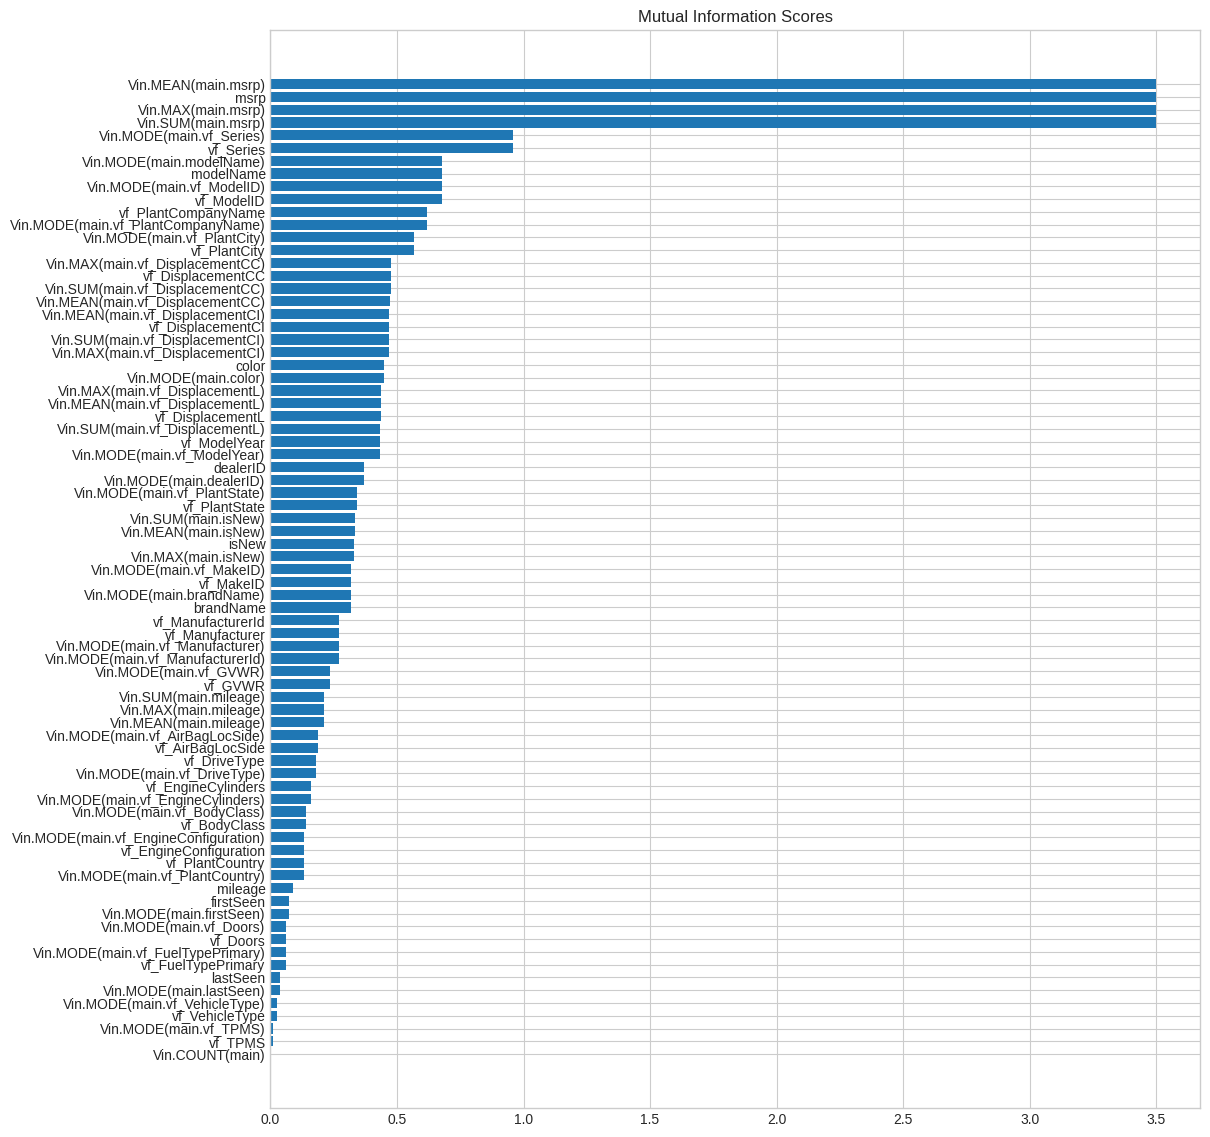

In [54]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 14))
plot_mi_scores(mi_scores)

For training a machine learning model, the features generated by FeatureTools and having a high mi score can be selected to train the model. Since this dataset is too large in term of dimension, it is possible to drop those columns with mi score less than 0.2 (eg. vf_TPMS). The correlation analysis also suitable to carried out to examined those features with high correlation and reduce it by dropping those features/columns.

Text(0.5, 1.0, 'Correlation Heatmap')

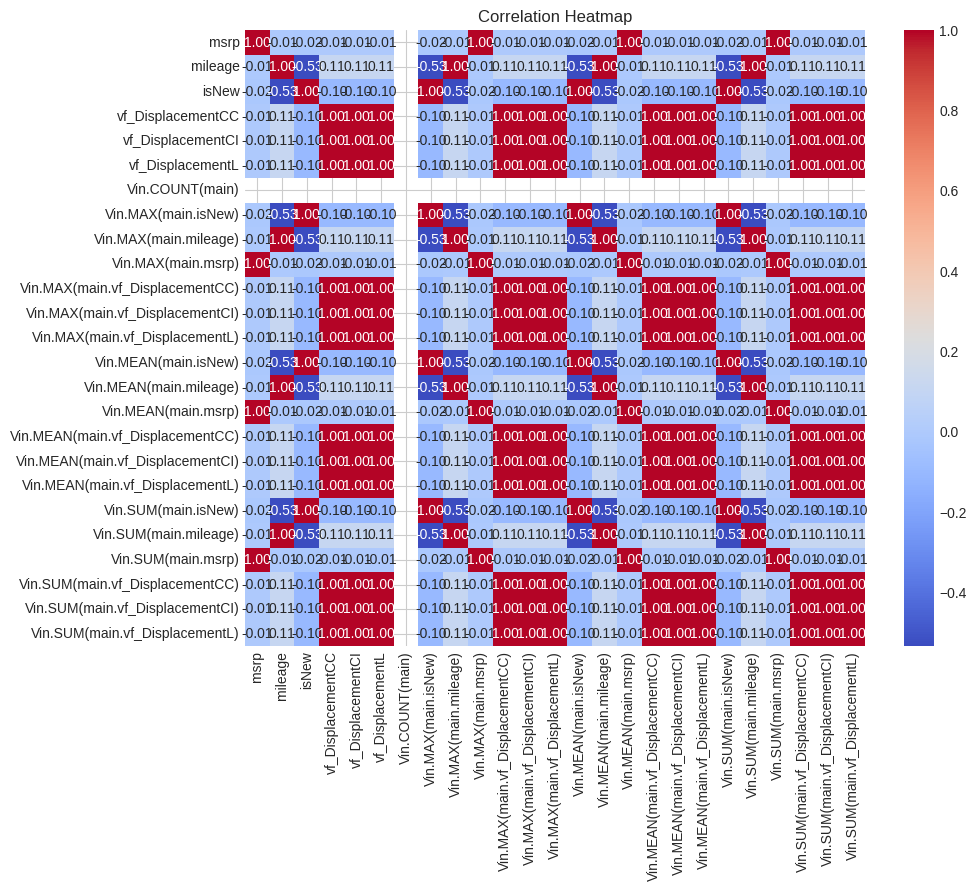

In [56]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Use Seaborn's heatmap function to create a correlation heatmap
sns.heatmap(features.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the plot
plt.title('Correlation Heatmap')

In [46]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Label encoding for categoricals
X_transformed = X_train_feature_creation

for colname in X_transformed.select_dtypes("object"):
    X_transformed[colname], _ = X_transformed[colname].factorize()
for colname in X_transformed.select_dtypes("category"):
    X_transformed[colname], _ = X_transformed[colname].factorize()
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X_transformed.dtypes == int


mi_scores1 = make_mi_scores(X_transformed, y_train, discrete_features)
mi_scores1[::3]  # show a few features with their MI scores

isNew*vf_DisplacementL**2                  0.532206
vf_DisplacementCC                          0.361095
log(vf_DisplacementL)/vf_DisplacementCC    0.330213
exp(vf_Doors)/vf_DisplacementL             0.321866
exp(vf_DisplacementL)                      0.296540
mileage**2/vf_DisplacementCC               0.291141
mileage                                    0.262076
mileage**2*exp(vf_DisplacementL)           0.202774
exp(vf_EngineCylinders)                    0.128523
vf_Doors                                   0.020062
Name: MI Scores, dtype: float64

Generate a bar plot to visualize the Mutual Information (MI) scores of different features concerning the target variable.

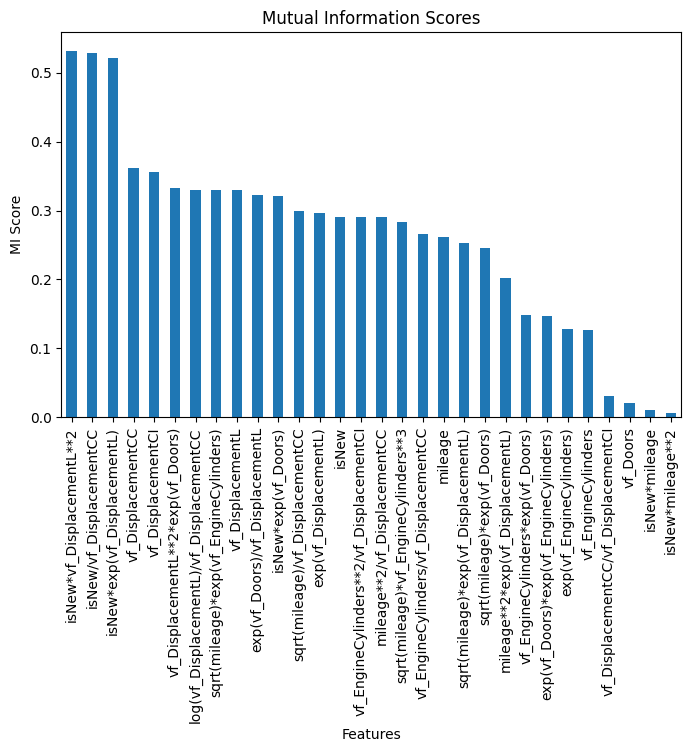

In [47]:
plt.figure(dpi=100, figsize=(8, 5))
#plot_mi_scores(mi_scores1)
mi_scores1.plot.bar()
plt.title('Mutual Information Scores')
plt.ylabel('MI Score')
plt.xlabel('Features')
plt.show()


Similar with before, the features generated by AutoFeat and having a high mi score can be selected to train the model. Since this dataset is too large in term of dimension, it is possible to drop those columns with mi score less than 0.2 (eg. vf_TPMS). The correlation analysis also suitable to carried out to examined those features with high correlation and reduce it by dropping those features/columns.

## 6. Visualization

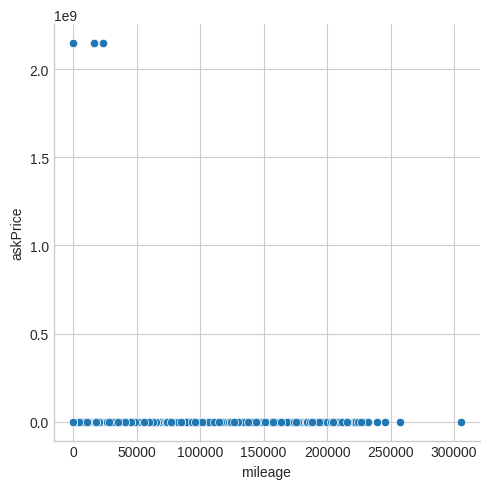

In [57]:
sns.relplot(x="mileage", y="askPrice", data=df);

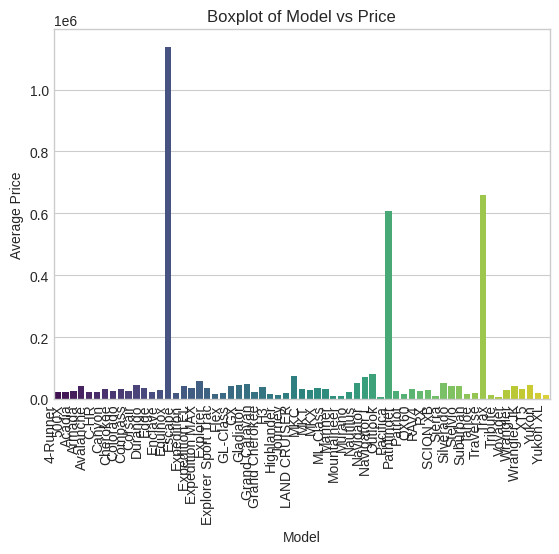

In [66]:
model_price = df.groupby('modelName')['askPrice'].agg('mean')
model_price

sns.barplot(x= model_price.index, y=model_price, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.title('Boxplot of Model vs Price')
plt.show()

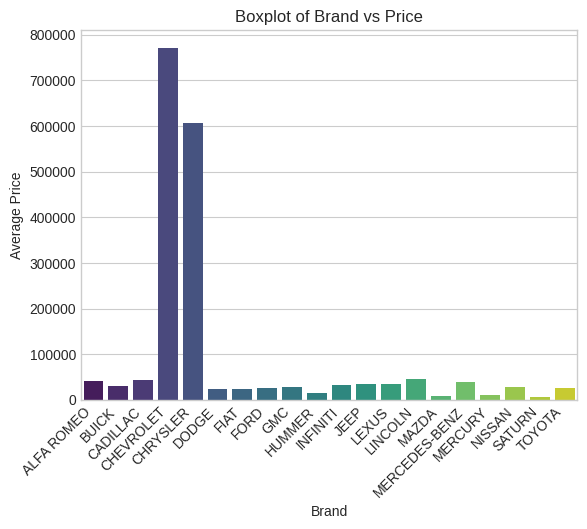

In [67]:
brand_price = df.groupby('brandName')['askPrice'].agg('mean')
brand_price

sns.barplot(x= brand_price.index, y=brand_price, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Boxplot of Brand vs Price')
plt.show()

 ## 7. Conclusion

Both Featuretools and Autofeat offer automated solutions for feature engineering, reducing the manual effort required.
Featuretools excels in handling complex datasets with multiple entities and relationships. Autofeat focuses on transforming and enhancing features, providing a streamlined approach for specific feature types. Leveraging these tools can lead to improved model performance and quicker iteration in the feature engineering process. It's essential to understand the nature of the data and the problem at hand to choose the most suitable tool or combination of tools.

---

 **Summary of Feature Engineering Steps Taken with Automated Tools**

 **FeatureTools**

  1. Create a DataFrame named 'Vin' containing unique VINs from the 'vin' column.
  Remove Duplicates and Add Main Entity:

  2. Remove duplicate rows in the original DataFrame based on the 'vin' column, keeping only the first occurrence.
  Add the main entity ('main') to the EntitySet, indexing it by the 'Vin' DataFrame.

  3. Add another entity ('Vin') to the EntitySet, representing the unique VINs.
  Establish Relationship:

  4. Establish a relationship between the 'Vin' entity and the 'main' entity, linking them using the 'vin' column.

  5. Use Featuretools' DFS function to generate new features based on specified aggregations and transformations.
  Output and Display:

  6. Output the first few rows of the generated features.
  Display the column names of the generated features.


---


**AutoFeat**
1. Utilizes the AutoFeatRegressor from the autofeat library to automatically generate new features for a DataFrame.

2.  Takes a 15% random sample of the DataFrame for training purposes.

3. Splits the data into training and testing sets. For the split, the train_test_split function is used, with a test size of 33%, ensuring that 42 is set as the random state for reproducibility.

4. Applies the AutoFeatRegressor to the training data to automatically create new features based on the provided parameters and dataset characteristics.